In [1]:
%load_ext autoreload
%autoreload 2
import importlib
import matplotlib.pyplot as plt
import numpy as np

import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import utils

importlib.reload(utils)
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

from src.analysis import BehavletsEncoding, GeomClustering
from src.visualization import GameVisualizer

# Behavlet encodings of all games

Specific behavlets algorithms are implemented in the `Behavlets` class. Higher level functionality and preferred access point is through the `BehavletsEncoding` class.


In [2]:
Beh_encodings = BehavletsEncoding(verbose=True)
vis = GameVisualizer()

import tqdm

with tqdm.tqdm(
    total=len(Beh_encodings.reader.level_df.level_id), desc="Calculating Behavlets"
) as pbar:
    for level_id in Beh_encodings.reader.level_df.level_id:
        try:
            Beh_encodings.calculate_behavlets(level_id=level_id)
            pbar.update(1)

        except Exception as e:
            print(f"error in level id {level_id}: {e}")
            pbar.update(1)

print(
    f"Calculated {len(Beh_encodings.instance_details)} behavlets in {len(Beh_encodings.reader.level_df)} levels:"
)
for behavlet in Beh_encodings.behavlets.values():
    print(
        f"{behavlet.full_name} - {Beh_encodings.instance_details.loc[Beh_encodings.instance_details['behavlet_name'] == behavlet.name].shape[0]} instances"
    )

Beh_encodings.summary_results.head()
# Beh_encodings.instance_details.head()

INFO - src.analysis.behavlets_encoding - Initializing BehavletsEncoding
INFO - src.analysis.behavlets_encoding - Behavlets initialized: ['Aggression1', 'Aggression3', 'Aggression4', 'Aggression6', 'Caution1', 'Caution2a', 'Caution2b', 'Caution3']
Calculating Behavlets: 100%|██████████| 938/938 [01:41<00:00,  9.24it/s]

Calculated 5493 behavlets in 938 levels:
Aggression 1 - Hunt close to ghost home - 175 instances
Aggression 3 - Ghost kills - 2635 instances
Aggresssion 4 - Hunt even after powerpill finishes - 219 instances
Aggression 6 - Chase Ghosts or Collect Pellets - 2189 instances
Caution 1 - Times trapped by Ghosts - 275 instances
Caution 2a - Average distance to ghosts - not on powerpill - 0 instances
Caution 2b - Average distance to ghosts - on powerpill - 0 instances
Caution 3 - Times trapped by Ghosts - 0 instances


,level_id,user_id,Aggression1_value,Aggression1_instances,Aggression1_value_per_instance,Aggression1_gamesteps,Aggression1_timesteps,Aggression3_value,Aggression3_instances,Aggression3_gamesteps,...,Caution1_timesteps,Caution1_died,Caution2a_value,Caution2a_instances,Caution2b_value,Caution2b_instances,Caution3_value,Caution3_instances,Caution3_gamesteps,Caution3_timesteps
1338,1338,74,0,0,[],[],[],5,5,"[(1243323, 1243343), (1243329, 1243349), (1243...",...,[],[],14.929798,0,21.479042,0,1,0,[],[]
1337,1337,74,0,0,[],[],[],5,5,"[(1242194, 1242214), (1242460, 1242480), (1242...",...,[],[],20.008530,0,22.719527,0,1,0,[],[]
1336,1336,74,0,0,[],[],[],3,3,"[(1241274, 1241294), (1241346, 1241366), (1241...",...,[],[],15.970044,0,12.404738,0,1,0,[],[]
1335,1335,74,0,0,[],[],[],6,6,"[(1239881, 1239901), (1239917, 1239937), (1240...",...,[],[],15.922709,0,14.963784,0,1,0,[],[]
1334,1334,74,0,0,[],[],[],4,4,"[(1238673, 1238693), (1238889, 1238909), (1238...",...,"[(52.540000915527344, 52.68999862670898)]",[True],18.350517,0,19.307337,0,1,0,[],[]


In [5]:
Beh_encodings.instance_details.sample(5)

# Beh_encodings.summary_results.head()

,level_id,user_id,behavlet_name,instance_idx,start_gamestep,end_gamestep,start_timestep,end_timestep,instant_gamestep,instant_position,instant_timestep,value_per_pill,died,value_per_instance
1018,1174,201,Aggression4,0,1067867,1067872,36.500000,36.750000,NaN,NaN,NaN,5.000000,True,NaN
932,1185,201,Aggression3,4,1079697,1079717,42.830002,42.830002,1079707.0,"(-9.995174407959, -15.499460220337)",42.830002,NaN,NaN,NaN
428,1266,163,Aggression6,2,1167721,1167841,23.389999,29.389999,NaN,NaN,NaN,0.558333,NaN,NaN
1223,1142,197,Aggression6,3,1028925,1029005,27.500000,31.490000,NaN,NaN,NaN,0.100000,NaN,NaN
891,1191,203,Aggression4,0,1085943,1085952,43.340000,43.790001,NaN,NaN,NaN,12.000000,False,NaN


# Data Exploration


## Aggression 1 - Hunt close to ghost house


In [6]:
BEHAV_TYPE = "Aggression1"
VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.

Beh_encodings.instance_details[
    (Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE)
].head()

,level_id,user_id,behavlet_name,instance_idx,start_gamestep,end_gamestep,start_timestep,end_timestep,instant_gamestep,instant_position,instant_timestep,value_per_pill,died,value_per_instance
193,1312,74,Aggression1,0,1215685,1215701,1215685.0,51.790001,NaN,NaN,NaN,NaN,NaN,16.0
198,1311,74,Aggression1,0,1214464,1214497,1214464.0,42.189999,NaN,NaN,NaN,NaN,NaN,33.0
230,1306,74,Aggression1,0,1208906,1208946,1208906.0,20.990000,NaN,NaN,NaN,NaN,NaN,40.0
321,1293,74,Aggression1,0,1195375,1195393,1195375.0,39.689999,NaN,NaN,NaN,NaN,NaN,18.0
355,1283,80,Aggression1,0,1183774,1183794,1183774.0,17.090000,NaN,NaN,NaN,NaN,NaN,20.0


In [ ]:
samples = Beh_encodings.instance_details[
    Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE
].sample(5, random_state=42)
for i, sample in samples.iterrows():
    _ = Beh_encodings.create_replay(
        sample, folder_path="../temp", path_suffix=f"_level_{sample.level_id}"
    )

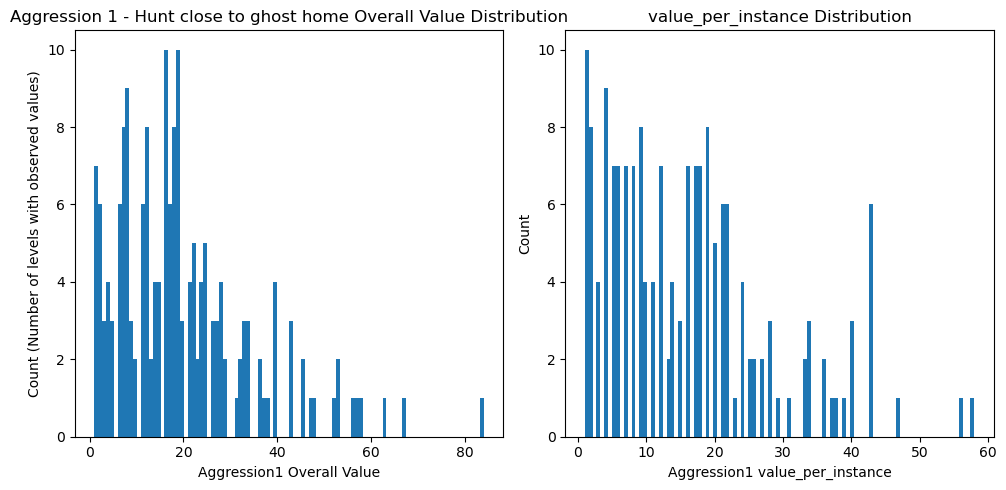

In [7]:
# BEHAV_TYPE = "Aggression1"

values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"][
    Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] != 0
]  ## Filtering out 0 values
# values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(values, bins=100)
# axs[0].violinplot(values)
axs[0].set_xlabel(f"{BEHAV_TYPE} Overall Value")
axs[0].set_ylabel("Count (Number of levels with observed values)")
axs[0].set_title(
    f"{Beh_encodings.behavlets[BEHAV_TYPE].full_name} Overall Value Distribution"
)


# VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.
instance_values = Beh_encodings.instance_details.loc[
    Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE, VALUE_TYPE
]
axs[1].hist(instance_values, bins=100)
axs[1].set_xlabel(f"{BEHAV_TYPE} {VALUE_TYPE}")
axs[1].set_ylabel("Count")
axs[1].set_title(f"{VALUE_TYPE} Distribution")
plt.tight_layout()
plt.show()

# Beh_encodings.summary_results[
#     (Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] < 200)
#     & (Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] > 50)
# ].loc[
#     :,
#     [
#         "level_id",
#         f"{BEHAV_TYPE}_gamesteps",
#         f"{BEHAV_TYPE}_timesteps",
#         f"{BEHAV_TYPE}_value",
#     ],
# ]

In [8]:
trajectories = Beh_encodings.get_trajectories(BEHAV_TYPE)

print(f"Number of trajectories: {len(trajectories)}")

# vis.plot_velocity_grid(trajectory=trajectories)

Clustering = GeomClustering(verbose=True, similarity_measure="dtw")

if os.path.exists(f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv"):
    Clustering.affinity_matrix = np.loadtxt(
        f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv", delimiter=","
    )
    if Clustering.affinity_matrix.shape[0] != len(trajectories):
        Clustering.calculate_affinity_matrix(trajectories=trajectories)
        np.savetxt(
            f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv",
            Clustering.affinity_matrix,
            delimiter=",",
        )

    labels = Clustering.fit(trajectories=trajectories, min_cluster_size=10)
else:
    ## Save affinity matrix after longer calculations (as DTW)
    Clustering.fit(trajectories=trajectories, min_cluster_size=10)
    np.savetxt(
        f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv",
        Clustering.affinity_matrix,
        delimiter=",",
    )

INFO - src.analysis.geom_clustering - Initializing GeomClustering with similarity measure: dtw
INFO - src.analysis.geom_clustering - Calculating affinity matrix


Number of trajectories: 175


Calculating affinity matrix: 100%|██████████| 15225/15225 [00:07<00:00, 2029.33it/s]
INFO - src.analysis.geom_clustering - Affinity matrix calculation complete in 7.51 seconds
INFO - src.analysis.geom_clustering - Fitting clustering model with 175 trajectories
INFO - src.analysis.geom_clustering - Using existing affinity matrix
INFO - src.analysis.geom_clustering - Starting HDBSCAN clustering with min_cluster_size=10 and min_samples=None
INFO - src.analysis.geom_clustering - HDBSCAN clustering complete in 0.01 seconds
INFO - src.analysis.geom_clustering - Clustering complete. Found 4 clusters


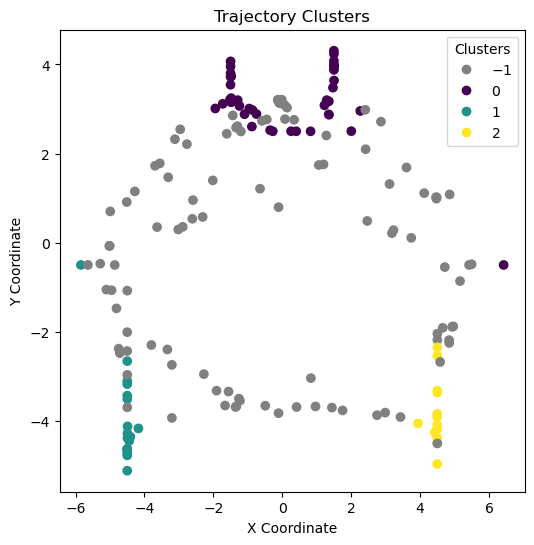

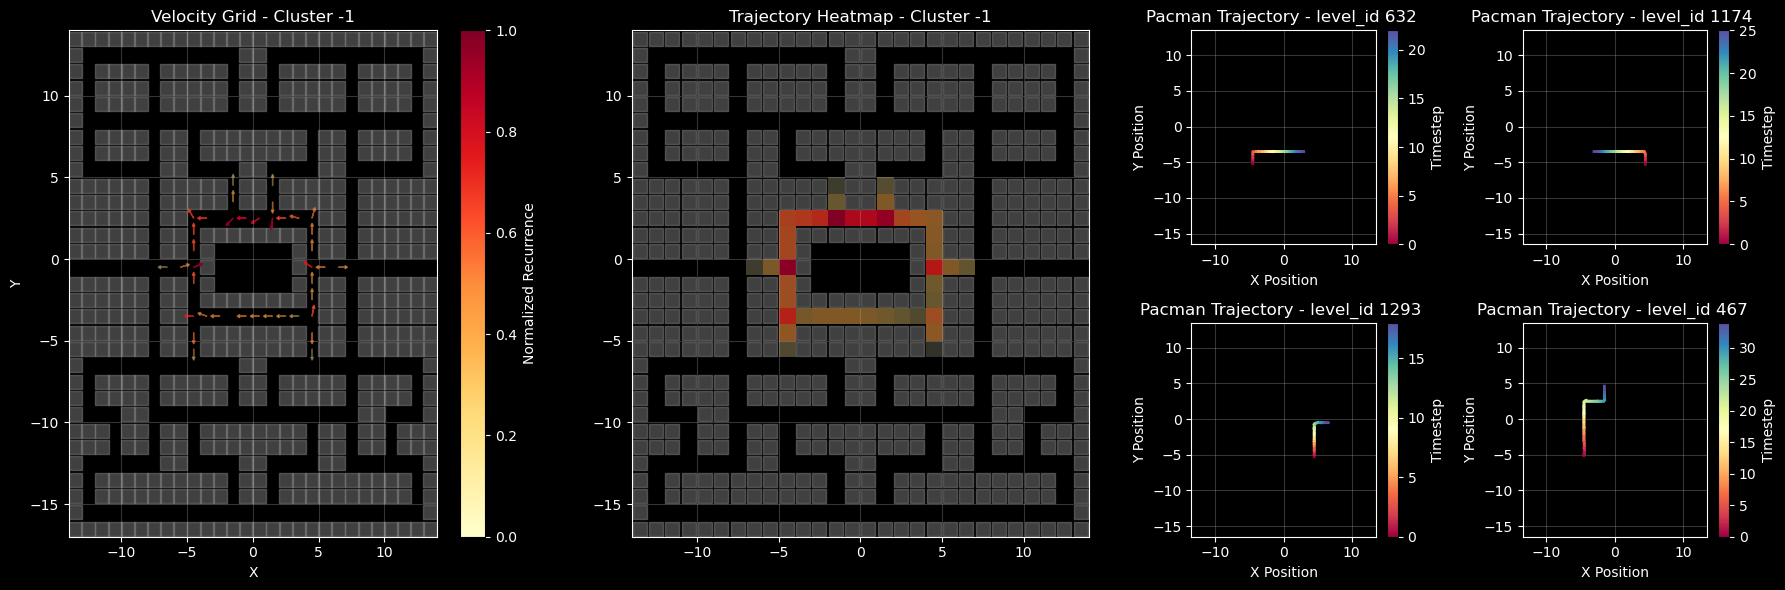

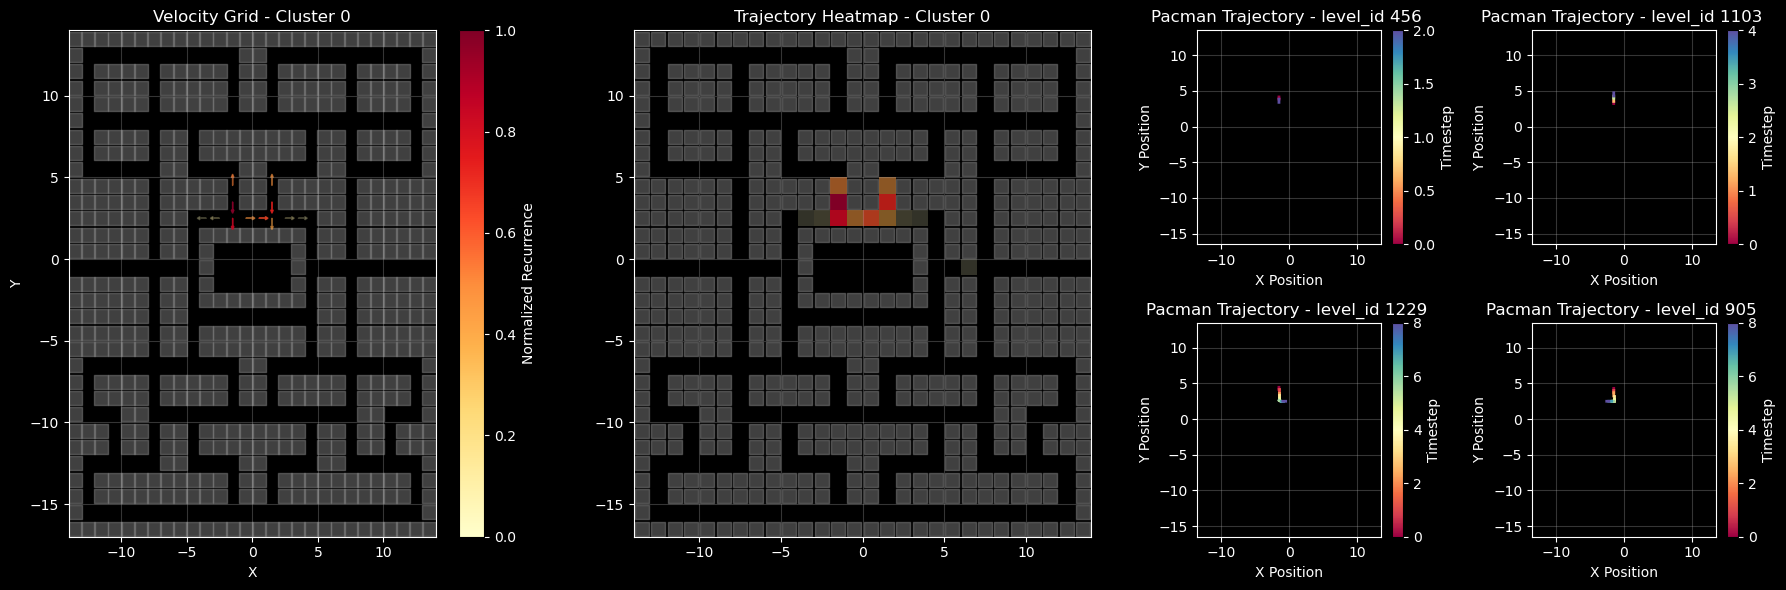

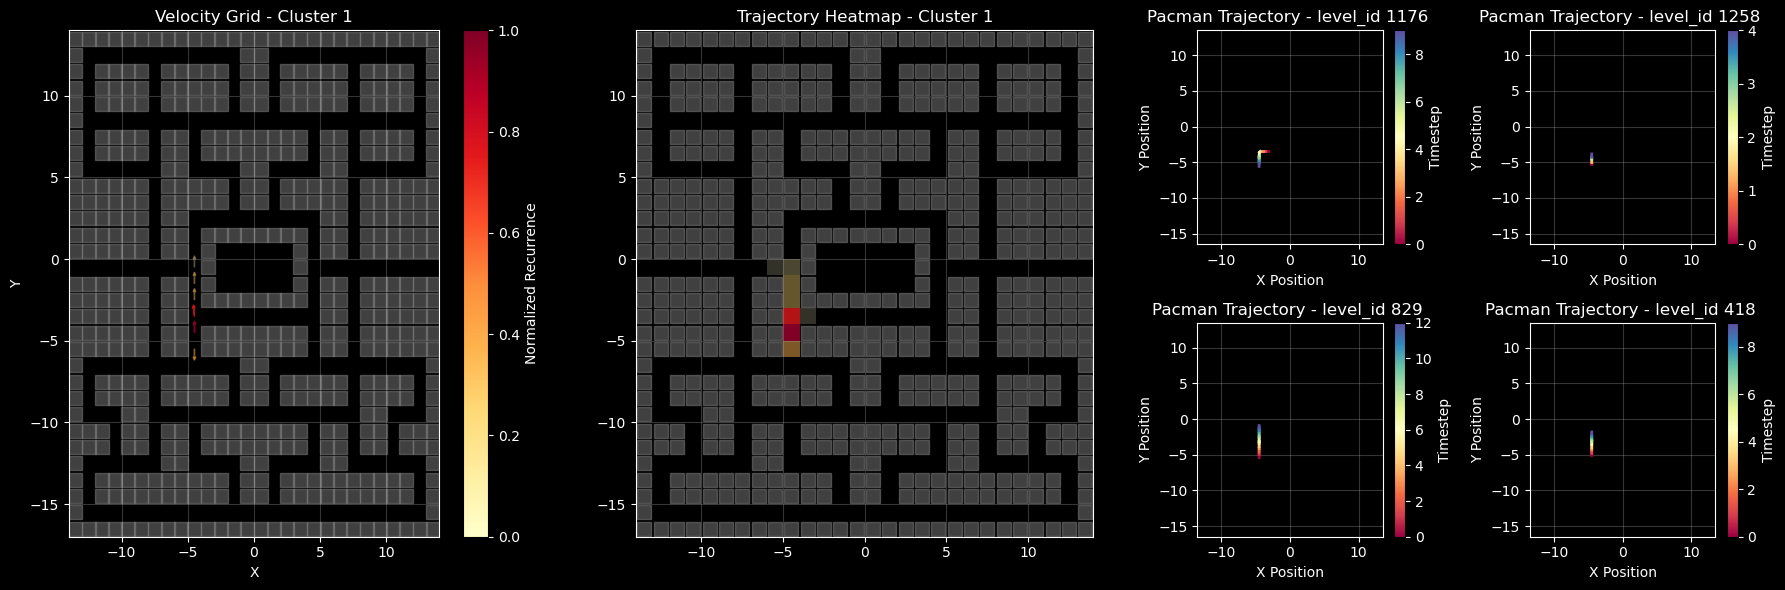

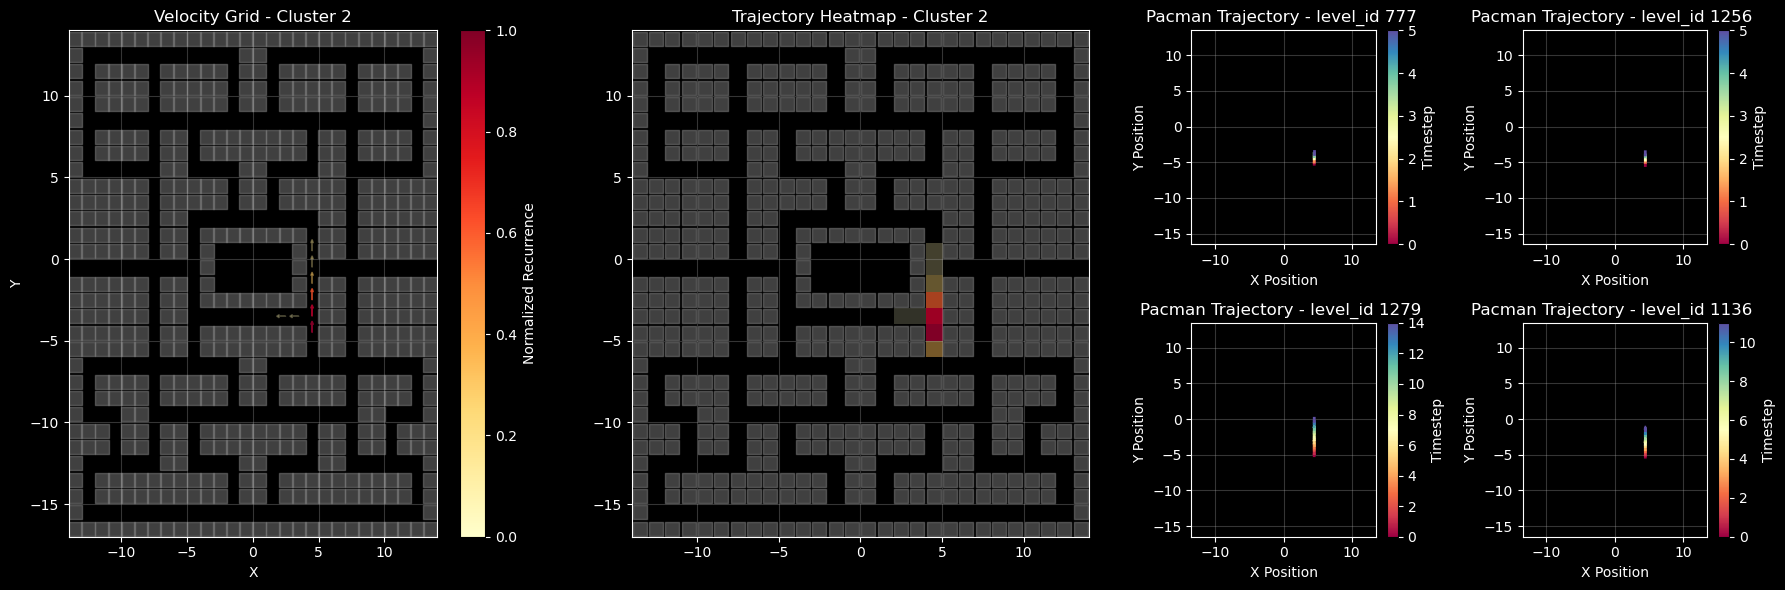

In [9]:
# Clustering.plot_affinity_matrix_overview()
Clustering.plot_trajectories_embedding(frame_to_maze=False)
for cluster_id in np.unique(Clustering.labels)[:5]:
    Clustering.plot_cluster_overview(cluster_id=cluster_id)

## Aggression 3 - Ghost Kills

In [20]:
BEHAV_TYPE = "Aggression3"
VALUE_TYPE = "instant_timestep"  # Or value_per_instance , value_per_pill, died, etc.

Beh_encodings.instance_details[
    (Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE)
].head()

,level_id,user_id,behavlet_name,instance_idx,start_gamestep,end_gamestep,start_timestep,end_timestep,instant_gamestep,instant_position,instant_timestep,value_per_pill,died,value_per_instance
0,1338,74,Aggression3,0,1243323,1243343,18.389999,18.389999,1243333.0,"(-10.502352714539, -12.367035865784)",18.389999,NaN,NaN,NaN
1,1338,74,Aggression3,1,1243329,1243349,18.690001,18.690001,1243339.0,"(-8.1967010498047, -12.500619888306)",18.690001,NaN,NaN,NaN
2,1338,74,Aggression3,2,1243340,1243360,19.240000,19.240000,1243350.0,"(-7.4964542388916, -9.4635725021362)",19.240000,NaN,NaN,NaN
3,1338,74,Aggression3,3,1243475,1243495,25.990000,25.990000,1243485.0,"(-12.504857063293, 9.2714891433716)",25.990000,NaN,NaN,NaN
4,1338,74,Aggression3,4,1243680,1243700,36.240002,36.240002,1243690.0,"(11.712596893311, 12.501050949097)",36.240002,NaN,NaN,NaN


In [ ]:
samples = Beh_encodings.instance_details[
    Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE
].sample(5, random_state=42)
for i, sample in samples.iterrows():
    _ = Beh_encodings.create_replay(
        sample, folder_path="../temp", path_suffix=f"_level_{sample.level_id}"
    )

In [ ]:
Beh_encodings.summary_results.loc[
    Beh_encodings.summary_results["Aggression3_value"] == 2,
]

,level_id,user_id,Aggression1_value,Aggression1_instances,Aggression1_value_per_instance,Aggression1_gamesteps,Aggression1_timesteps,Aggression3_value,Aggression3_instances,Aggression3_gamesteps,...,Aggression6_instances,Aggression6_value_per_pill,Aggression6_gamesteps,Aggression6_timesteps,Caution1_value,Caution1_instances,Caution1_value_per_instance,Caution1_gamesteps,Caution1_timesteps,Caution1_died
1320,1320,74,0,0,[],[],[],2,2,"[(1223642, 1223662), (1223659, 1223679)]",...,1,"[0, 0, 0, 0.575]","[None, None, None, (1223642, 1223682)]","[None, None, None, (13.350000381469728, 15.350...",0,0,[],[],[],[]
1312,1312,74,16,1,[16],"[(1215685, 1215701)]","[(1215685, 51.790000915527344)]",2,2,"[(1215211, 1215231), (1215275, 1215295)]",...,2,"[0.1, 0, 0, 0.15]","[(1215643, 1215723), None, None, (1215211, 121...","[(48.88999938964844, 52.88999938964844), None,...",0,0,[],[],[],[]
1302,1302,74,0,0,[],[],[],2,2,"[(1204587, 1204607), (1205205, 1205225)]",...,3,"[0.01, 0.08, 0.17, 0]","[(1205053, 1205153), (1205205, 1205305), (1204...","[(30.38999938964844, 35.38999938964844), (37.9...",0,0,[],[],[],[]
1294,1294,74,0,0,[],[],[],2,2,"[(1196346, 1196366), (1196591, 1196611)]",...,2,"[0.2, 0, 0, 0.35]","[(1196576, 1196676), None, None, (1196265, 119...","[(27.239999771118164, 32.2400016784668), None,...",0,0,[],[],[],[]
1283,1283,80,23,2,"[20, 3]","[(1183774, 1183794), (1184258, 1184261)]","[(1183774, 17.09000015258789), (1184258, 40.43...",2,2,"[(1183731, 1183751), (1183735, 1183755)]",...,2,"[0.15, 0, 0, 0.25]","[(1183922, 1184002), None, None, (1183719, 118...","[(23.479999542236328, 27.479999542236328), Non...",0,0,[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,399,69,0,0,[],[],[],2,2,"[(231369, 231389), (231527, 231547)]",...,2,"[0, 0.21666666666666667, 0.25, 0]","[None, (231426, 231546), (231273, 231393), None]","[None, (14.800000190734863, 20.780000686645508...",0,0,[],[],[],[]
397,397,67,0,0,[],[],[],2,2,"[(229917, 229937), (229917, 229937)]",...,1,"[0, 0, 0, 0.11666666666666667]","[None, None, None, (229881, 229941)]","[None, None, None, (13.149999618530272, 16.139...",0,0,[],[],[],[]
396,396,67,0,0,[],[],[],2,2,"[(229108, 229128), (229510, 229530)]",...,2,"[0.0875, 0.14814814814814814, 0, 0]","[(229508, 229588), (229094, 229175), None, None]","[(44.25, 48.25), (23.540000915527344, 27.59000...",1,1,[14],"[(228879, 228892)]","[(12.800000190734863, 13.449999809265137)]",[True]
393,393,64,0,0,[],[],[],2,2,"[(225923, 225943), (225938, 225958)]",...,2,"[0, 0, 0.39, 0.16]","[None, None, (225901, 226001), (225487, 225587)]","[None, None, (36.09999847412109, 41.0999984741...",1,1,[2],"[(226197, 226199)]","[(50.88999938964844, 50.9900016784668)]",[False]


In [38]:
values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"]

print(values.value_counts(sort=False))
print(values.unique())

Aggression3_value
5     94
3    135
6     74
4    122
1    126
0    207
7     43
8     13
2    117
9      7
Name: count, dtype: int64
[5 3 6 4 1 0 7 8 2 9]


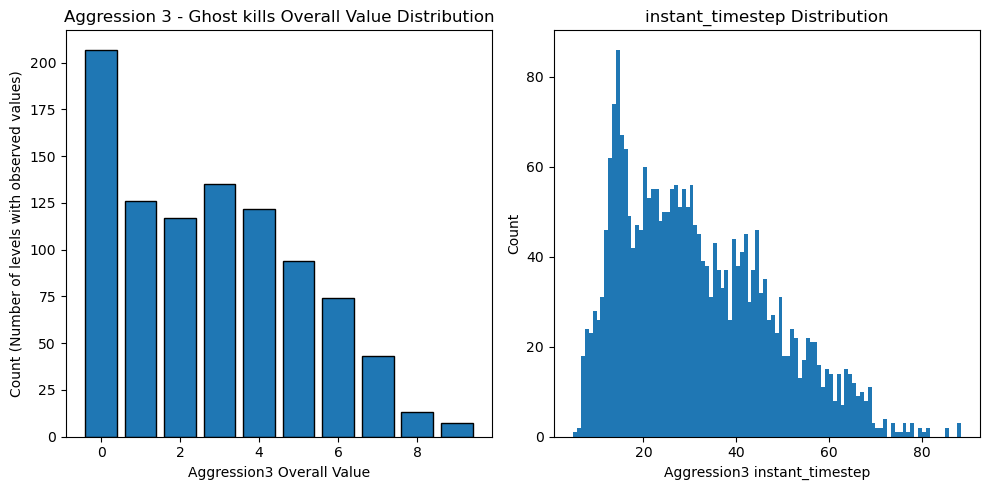

In [39]:
# BEHAV_TYPE = "Aggression1"

# values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"][Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] != 0] ## Filtering out 0 values
values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(values.unique(), values.value_counts(sort=False), edgecolor="black")
# axs[0].violinplot(values)
axs[0].set_xlabel(f"{BEHAV_TYPE} Overall Value")
axs[0].set_ylabel("Count (Number of levels with observed values)")
axs[0].set_title(
    f"{Beh_encodings.behavlets[BEHAV_TYPE].full_name} Overall Value Distribution"
)


# VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.
instance_values = Beh_encodings.instance_details.loc[
    Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE, VALUE_TYPE
]
axs[1].hist(instance_values, bins=100)
axs[1].set_xlabel(f"{BEHAV_TYPE} {VALUE_TYPE}")
axs[1].set_ylabel("Count")
axs[1].set_title(f"{VALUE_TYPE} Distribution")
plt.tight_layout()
plt.show()

# Beh_encodings.summary_results[
#     (Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] < 200)
#     & (Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] > 50)
# ].loc[
#     :,
#     [
#         "level_id",
#         f"{BEHAV_TYPE}_gamesteps",
#         f"{BEHAV_TYPE}_timesteps",
#         f"{BEHAV_TYPE}_value",
#     ],
# ]

In [12]:
trajectories = Beh_encodings.get_trajectories(BEHAV_TYPE)

print(f"Number of trajectories: {len(trajectories)}")

# vis.plot_velocity_grid(trajectory=trajectories)

Clustering = GeomClustering(verbose=True, similarity_measure="dtw")

if os.path.exists(f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv"):
    Clustering.affinity_matrix = np.loadtxt(
        f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv", delimiter=","
    )
    if Clustering.affinity_matrix.shape[0] != len(trajectories):
        Clustering.calculate_affinity_matrix(trajectories=trajectories)
        np.savetxt(
            f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv",
            Clustering.affinity_matrix,
            delimiter=",",
        )

    labels = Clustering.fit(trajectories=trajectories, min_cluster_size=10)
else:
    ## Save affinity matrix after longer calculations (as DTW)
    Clustering.fit(trajectories=trajectories, min_cluster_size=10)
    np.savetxt(
        f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv",
        Clustering.affinity_matrix,
        delimiter=",",
    )

INFO - src.analysis.geom_clustering - Initializing GeomClustering with similarity measure: dtw


Number of trajectories: 2635


INFO - src.analysis.geom_clustering - Fitting clustering model with 2635 trajectories
INFO - src.analysis.geom_clustering - Using existing affinity matrix
INFO - src.analysis.geom_clustering - Starting HDBSCAN clustering with min_cluster_size=10 and min_samples=None
INFO - src.analysis.geom_clustering - HDBSCAN clustering complete in 0.23 seconds
INFO - src.analysis.geom_clustering - Clustering complete. Found 36 clusters


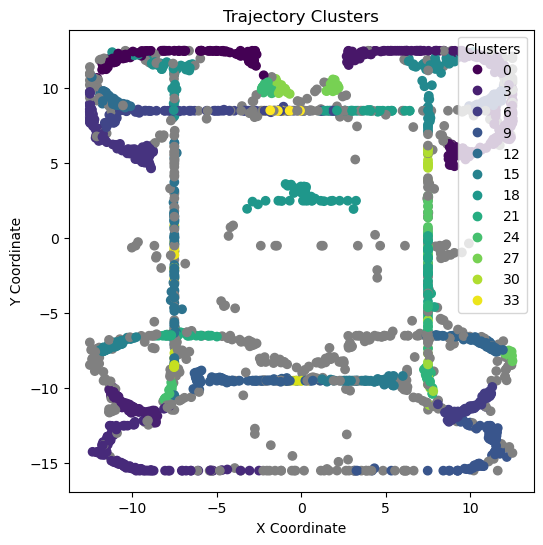

In [13]:
# Clustering.plot_affinity_matrix_overview()
Clustering.plot_trajectories_embedding(frame_to_maze=False)
# for cluster_id in np.unique(Clustering.labels)[:5]:
#     Clustering.plot_cluster_overview(cluster_id=cluster_id)

## Aggression 4 Hunt Ghosts after Powerpill


In [41]:
BEHAV_TYPE = "Aggression4"
VALUE_TYPE = "value_per_pill"  # Or value_per_instance , value_per_pill, died, etc.

Beh_encodings.instance_details[
    (Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE)
].head()

,level_id,user_id,behavlet_name,instance_idx,start_gamestep,end_gamestep,start_timestep,end_timestep,instant_gamestep,instant_position,instant_timestep,value_per_pill,died,value_per_instance
19,1336,74,Aggression4,2,1241289,1241298,21.98,22.430000,NaN,NaN,NaN,3.0,False,NaN
66,1330,74,Aggression4,3,1234535,1234544,18.75,19.200001,NaN,NaN,NaN,3.0,False,NaN
92,1327,74,Aggression4,1,1230805,1230814,22.24,22.690001,NaN,NaN,NaN,2.0,False,NaN
136,1320,74,Aggression4,3,1223682,1223691,15.35,15.790000,NaN,NaN,NaN,4.0,False,NaN
151,1318,74,Aggression4,1,1221869,1221874,37.34,37.590000,NaN,NaN,NaN,6.0,True,NaN


In [ ]:
samples = Beh_encodings.instance_details[
    Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE
].sample(5, random_state=42)
for i, sample in samples.iterrows():
    _ = Beh_encodings.create_replay(
        sample, folder_path="../temp", path_suffix=f"_level_{sample.level_id}"
    )

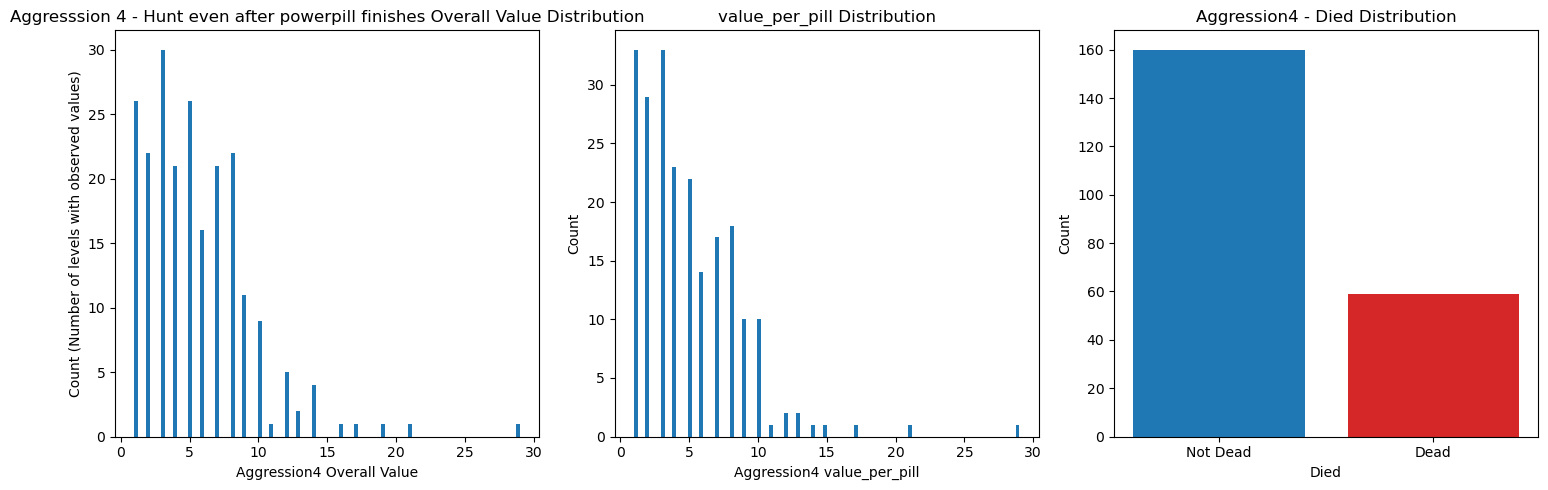

In [42]:
# BEHAV_TYPE = "Aggression1"

values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"][
    Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] != 0
]  ## Filtering out 0 values
# values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(values, bins=100)
# axs[0].violinplot(values)
axs[0].set_xlabel(f"{BEHAV_TYPE} Overall Value")
axs[0].set_ylabel("Count (Number of levels with observed values)")
axs[0].set_title(
    f"{Beh_encodings.behavlets[BEHAV_TYPE].full_name} Overall Value Distribution"
)


# VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.
instance_values = Beh_encodings.instance_details.loc[
    Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE, VALUE_TYPE
]
axs[1].hist(instance_values, bins=100)
axs[1].set_xlabel(f"{BEHAV_TYPE} {VALUE_TYPE}")
axs[1].set_ylabel("Count")
axs[1].set_title(f"{VALUE_TYPE} Distribution")

# Plot the count of dead vs not dead (bar plot)
dead_instances = Beh_encodings.instance_details[
    (Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE)
]

# Only consider rows where 'died' is True or False (not NaN)
dead_instances = dead_instances[dead_instances["died"].isin([True, False])]

dead_counts = (
    dead_instances["died"].value_counts().sort_index()
)  # False first, then True

axs[2].bar(
    ["Not Dead", "Dead"],
    [dead_counts.get(False, 0), dead_counts.get(True, 0)],
    color=["tab:blue", "tab:red"],
)
axs[2].set_xlabel("Died")
axs[2].set_ylabel("Count")
axs[2].set_title(f"{BEHAV_TYPE} - Died Distribution")

plt.tight_layout()
plt.show()

In [43]:
trajectories = Beh_encodings.get_trajectories(BEHAV_TYPE)

print(f"Number of trajectories: {len(trajectories)}")

# vis.plot_velocity_grid(trajectory=trajectories)

Clustering = GeomClustering(verbose=True, similarity_measure="dtw")

if os.path.exists(f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv"):
    Clustering.affinity_matrix = np.loadtxt(
        f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv", delimiter=","
    )
    if Clustering.affinity_matrix.shape[0] != len(trajectories):
        Clustering.calculate_affinity_matrix(trajectories=trajectories)
        np.savetxt(
            f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv",
            Clustering.affinity_matrix,
            delimiter=",",
        )

    labels = Clustering.fit(trajectories=trajectories, min_cluster_size=10)
else:
    ## Save affinity matrix after longer calculations (as DTW)
    Clustering.fit(trajectories=trajectories, min_cluster_size=10)
    np.savetxt(
        f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv",
        Clustering.affinity_matrix,
        delimiter=",",
    )

INFO - src.analysis.geom_clustering - Initializing GeomClustering with similarity measure: dtw
INFO - src.analysis.geom_clustering - Fitting clustering model with 219 trajectories
INFO - src.analysis.geom_clustering - Using existing affinity matrix
INFO - src.analysis.geom_clustering - Starting HDBSCAN clustering with min_cluster_size=10 and min_samples=None
INFO - src.analysis.geom_clustering - HDBSCAN clustering complete in 0.01 seconds
INFO - src.analysis.geom_clustering - Clustering complete. Found 2 clusters


Number of trajectories: 219


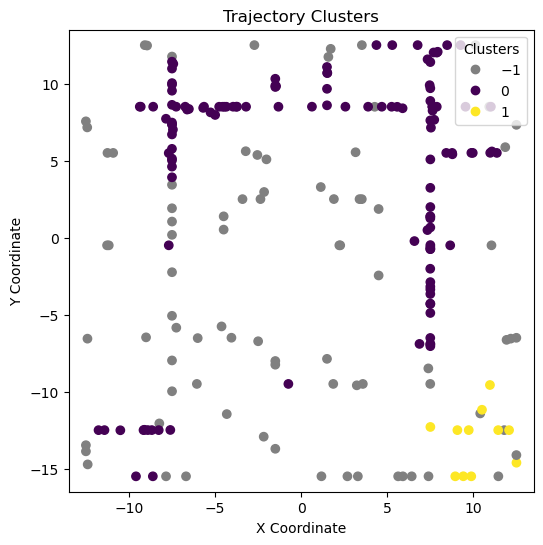

In [44]:
# Clustering.plot_affinity_matrix_overview()
Clustering.plot_trajectories_embedding(frame_to_maze=True)
# for cluster_id in np.unique(Clustering.labels)[:5]:
#     Clustering.plot_cluster_overview(cluster_id=cluster_id)

## Aggression 6 - Chase Ghosts or Collect Dots

In [18]:
BEHAV_TYPE = "Aggression6"
VALUE_TYPE = "value_per_pill"  # Or value_per_instance , value_per_pill, died, etc.

Beh_encodings.instance_details[
    (Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE)
].head()

,level_id,user_id,behavlet_name,instance_idx,start_gamestep,end_gamestep,start_timestep,end_timestep,instant_gamestep,instant_position,instant_timestep,value_per_pill,died,value_per_instance
5,1338,74,Aggression6,0,1243479,1243579,25.690001,30.690001,NaN,NaN,NaN,0.030,NaN,NaN
6,1338,74,Aggression6,1,1243681,1243781,35.790001,40.790001,NaN,NaN,NaN,0.060,NaN,NaN
7,1338,74,Aggression6,3,1243318,1243418,17.639999,22.639999,NaN,NaN,NaN,0.250,NaN,NaN
13,1337,74,Aggression6,0,1242731,1242851,53.889999,59.889999,NaN,NaN,NaN,0.025,NaN,NaN
14,1337,74,Aggression6,1,1242466,1242586,40.639999,46.639999,NaN,NaN,NaN,0.450,NaN,NaN


In [ ]:
samples = Beh_encodings.instance_details[
    Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE
].sample(5, random_state=42)
for i, sample in samples.iterrows():
    _ = Beh_encodings.create_replay(
        sample, folder_path="../temp", path_suffix=f"_level_{sample.level_id}"
    )

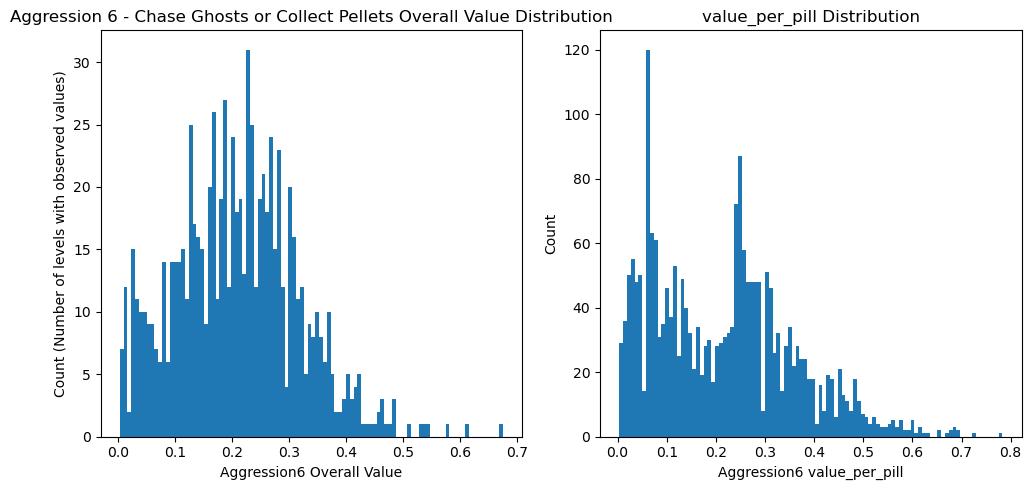

In [19]:
## TODO overview this whithout the distance threshold constrain

values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"][
    Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] != 0
]  ## Filtering out 0 values
# values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(values, bins=100)
# axs[0].violinplot(values)
axs[0].set_xlabel(f"{BEHAV_TYPE} Overall Value")
axs[0].set_ylabel("Count (Number of levels with observed values)")
axs[0].set_title(
    f"{Beh_encodings.behavlets[BEHAV_TYPE].full_name} Overall Value Distribution"
)


# VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.
instance_values = Beh_encodings.instance_details.loc[
    Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE, VALUE_TYPE
]
axs[1].hist(instance_values, bins=100)
axs[1].set_xlabel(f"{BEHAV_TYPE} {VALUE_TYPE}")
axs[1].set_ylabel("Count")
axs[1].set_title(f"{VALUE_TYPE} Distribution")
plt.tight_layout()
plt.show()

In [20]:
trajectories = Beh_encodings.get_trajectories(BEHAV_TYPE)

print(f"Number of trajectories: {len(trajectories)}")

# vis.plot_velocity_grid(trajectory=trajectories)

Clustering = GeomClustering(verbose=True, similarity_measure="dtw")

if os.path.exists(f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv"):
    Clustering.affinity_matrix = np.loadtxt(
        f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv", delimiter=","
    )
    if Clustering.affinity_matrix.shape[0] != len(trajectories):
        Clustering.calculate_affinity_matrix(trajectories=trajectories)
        np.savetxt(
            f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv",
            Clustering.affinity_matrix,
            delimiter=",",
        )

    labels = Clustering.fit(trajectories=trajectories, min_cluster_size=10)
else:
    ## Save affinity matrix after longer calculations (as DTW)
    Clustering.fit(trajectories=trajectories, min_cluster_size=10)
    np.savetxt(
        f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv",
        Clustering.affinity_matrix,
        delimiter=",",
    )

INFO - src.analysis.geom_clustering - Initializing GeomClustering with similarity measure: dtw


Number of trajectories: 2189


INFO - src.analysis.geom_clustering - Fitting clustering model with 2189 trajectories
INFO - src.analysis.geom_clustering - Using existing affinity matrix
INFO - src.analysis.geom_clustering - Starting HDBSCAN clustering with min_cluster_size=10 and min_samples=None
INFO - src.analysis.geom_clustering - HDBSCAN clustering complete in 0.15 seconds
INFO - src.analysis.geom_clustering - Clustering complete. Found 16 clusters


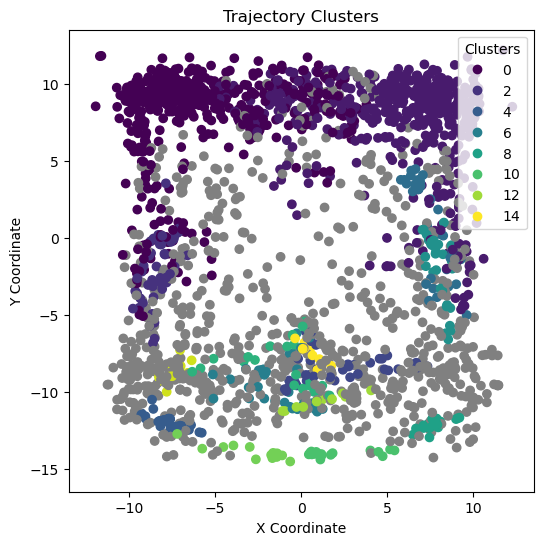

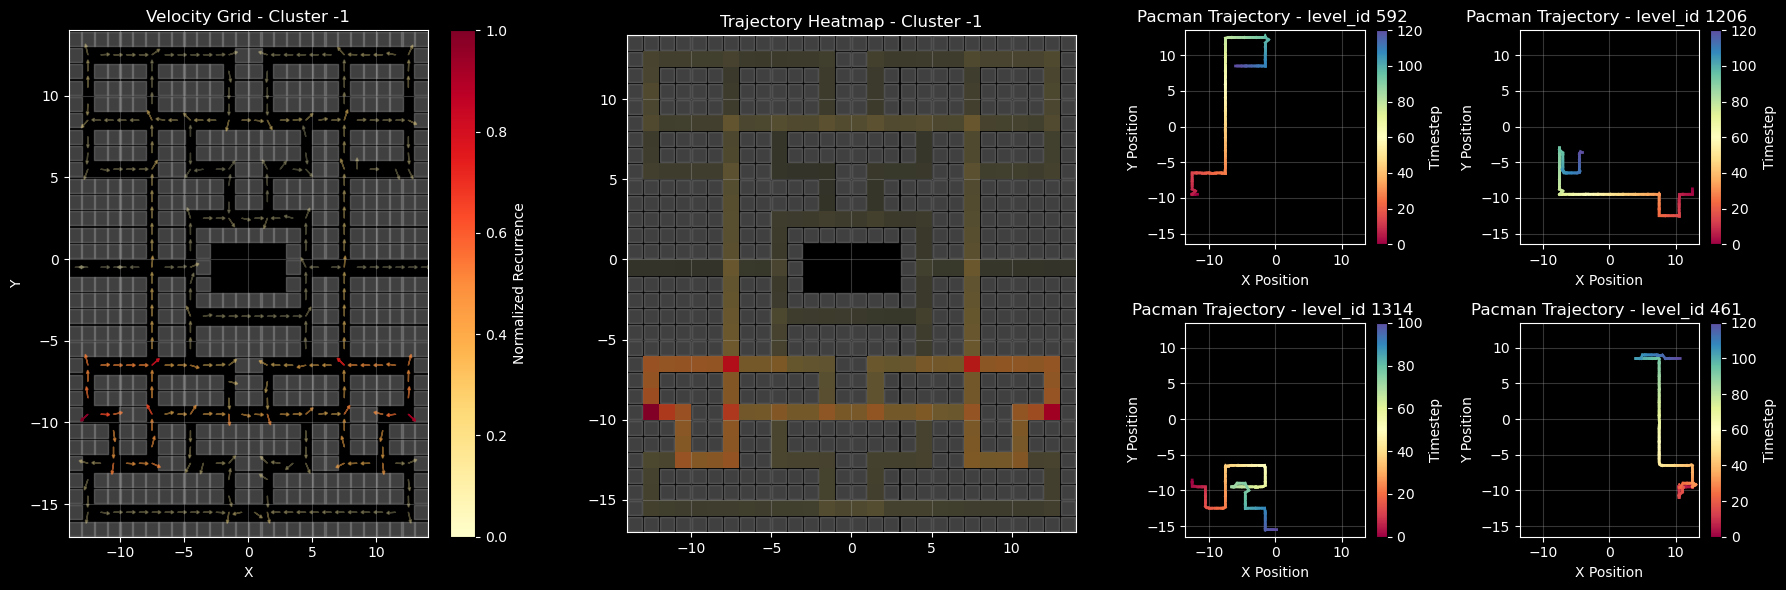

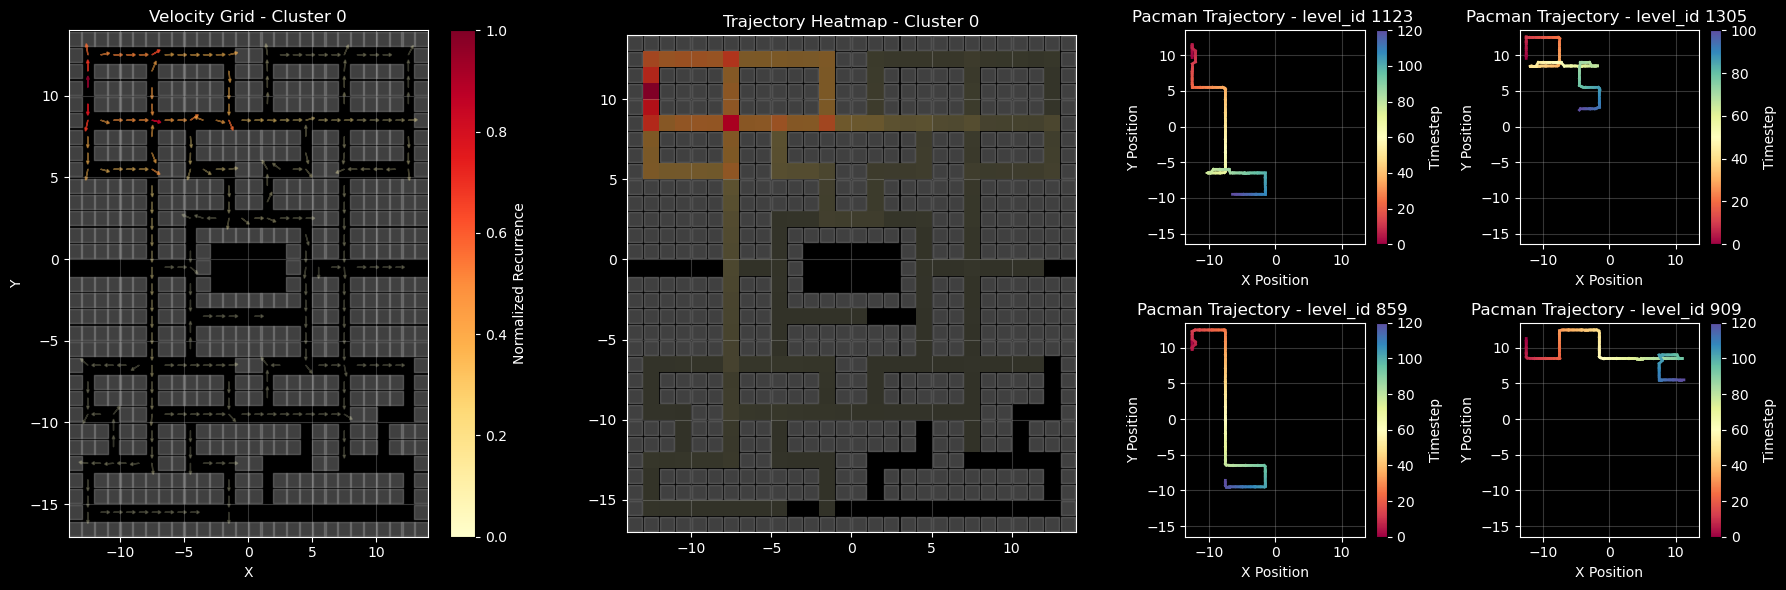

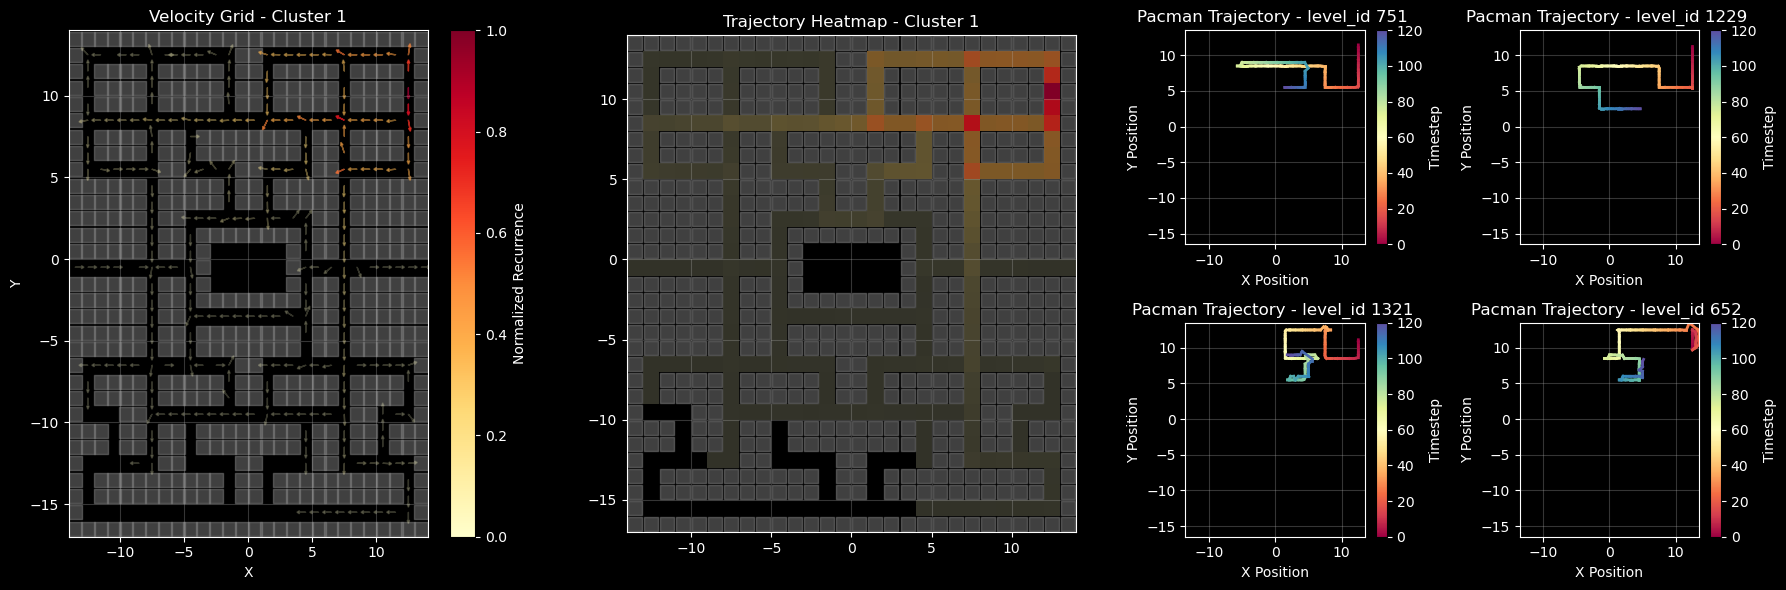

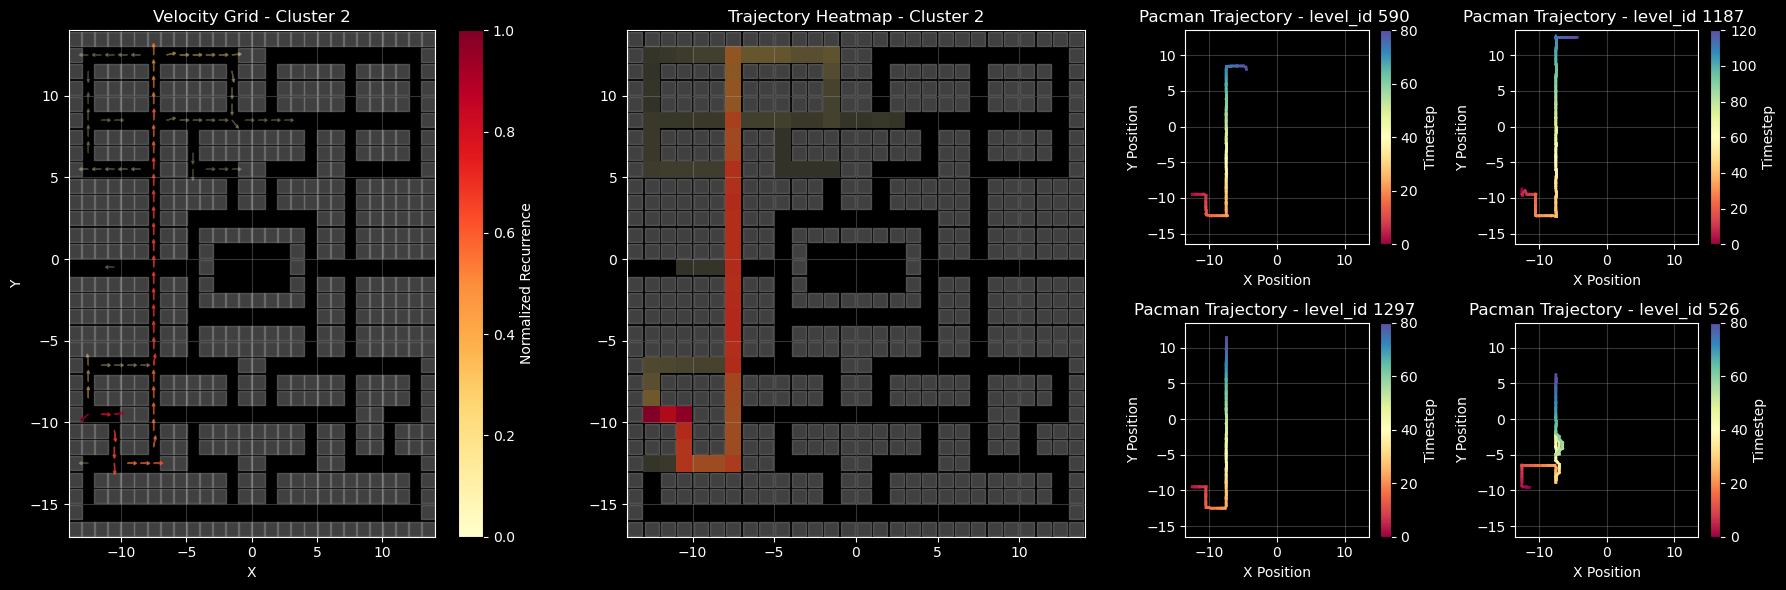

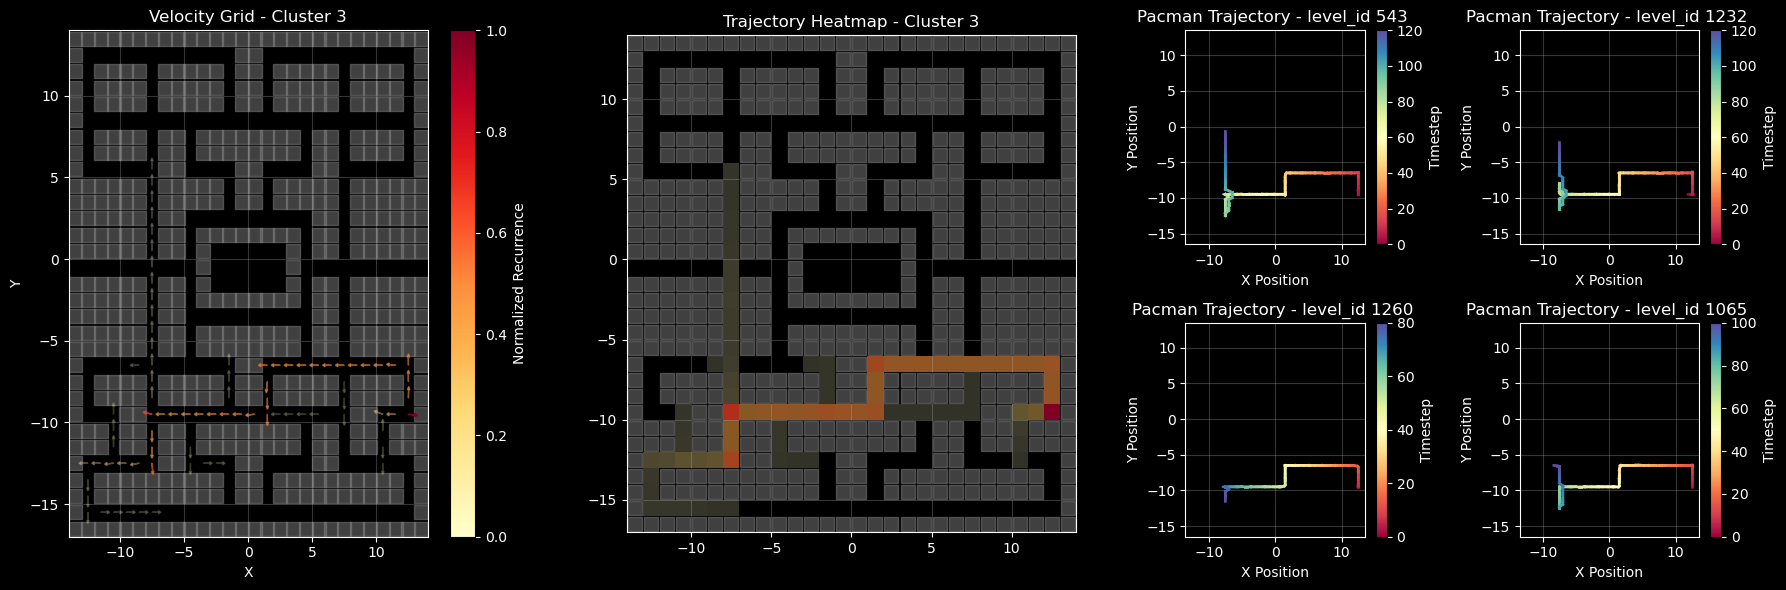

In [21]:
# Clustering.plot_affinity_matrix_overview()
Clustering.plot_trajectories_embedding(frame_to_maze=True)
for cluster_id in np.unique(Clustering.labels)[:5]:
    Clustering.plot_cluster_overview(cluster_id=cluster_id)

In [22]:
Beh_encodings.get_vector_encodings()

,Aggression1_value,Aggression3_value,Aggression4_value,Aggression6_value,Caution1_value
1338,0,5,0,0.113333,0
1337,0,5,0,0.230556,0
1336,0,3,3,0.466667,0
1335,0,6,0,0.462500,0
1334,0,4,0,0.133333,1
...,...,...,...,...,...
392,0,6,5,0.349657,0
391,0,4,0,0.383960,0
390,0,3,0,0.164880,0
389,0,2,0,0.180000,0


## Caution 1


In [38]:
BEHAV_TYPE = "Caution1"
VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.

Beh_encodings.instance_details[
    (Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE)
].head()

print(f"Number of observed instances: {Beh_encodings.instance_details[(Beh_encodings.instance_details['behavlet_name'] == BEHAV_TYPE)].shape[0]}")

Number of observed instances: 275


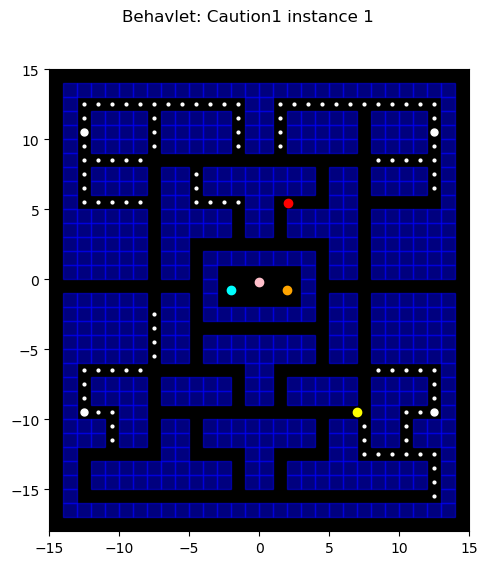

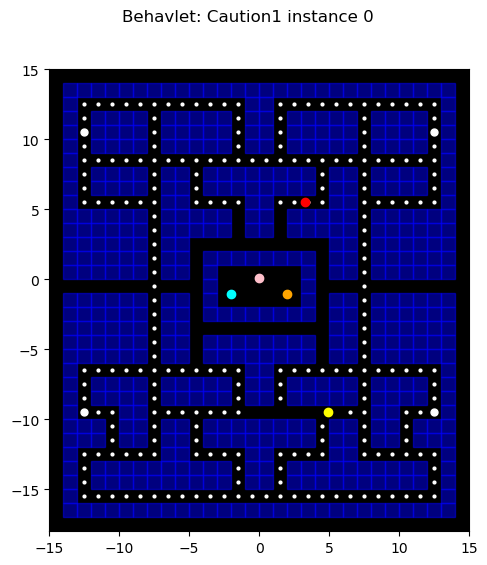

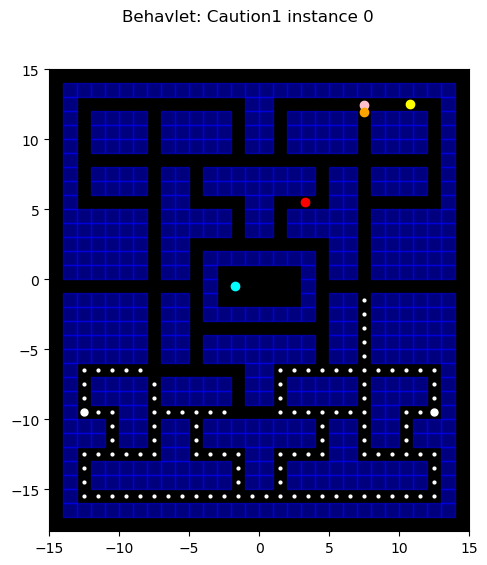

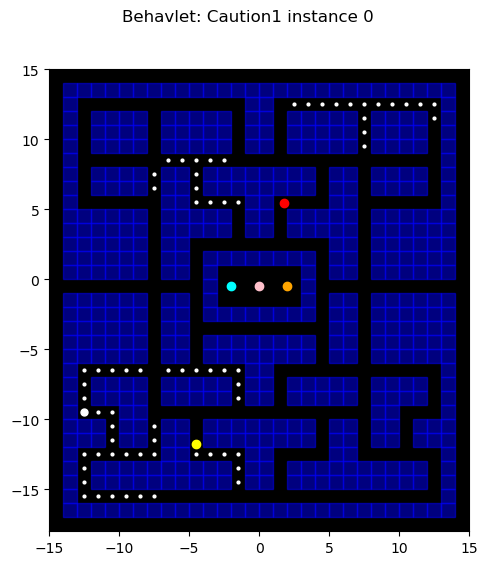

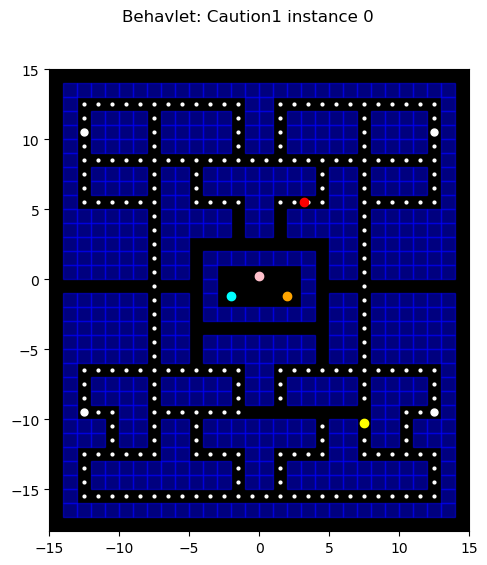

In [41]:
samples = Beh_encodings.instance_details[
    Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE
].sample(5, random_state=42)
for i, sample in samples.iterrows():
    _ = Beh_encodings.create_replay(
        sample, folder_path="../temp", path_suffix=f"_level_{sample.level_id}", context_lenth=20
    )

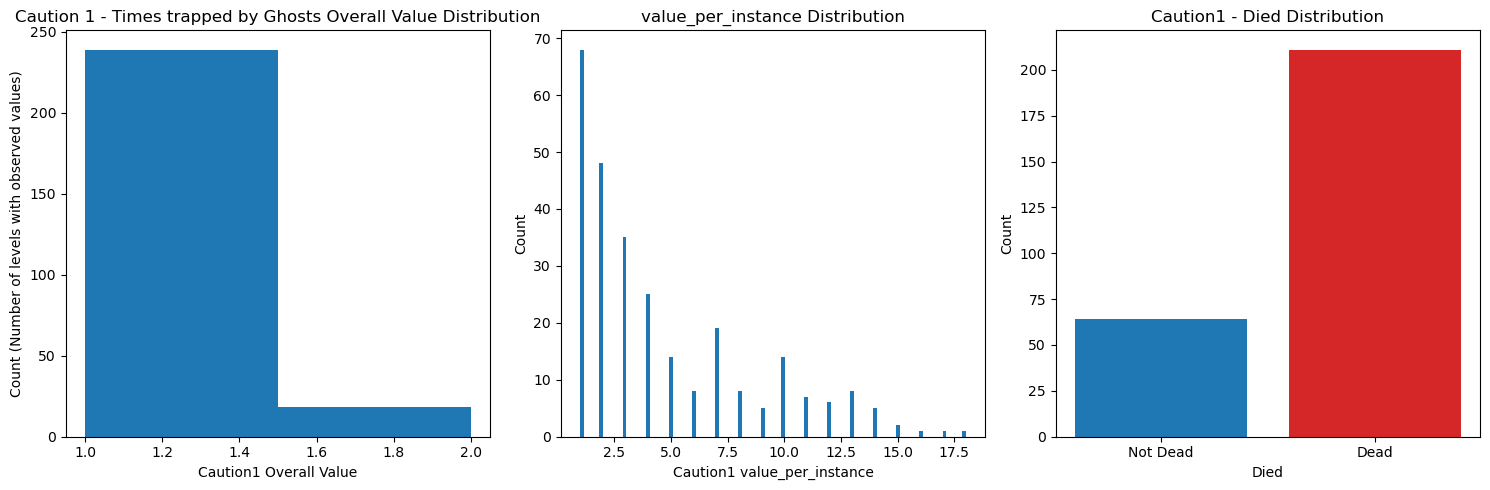

In [6]:
values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"][
    Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] != 0
]  ## Filtering out 0 values
# values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(values, bins=2)
# axs[0].violinplot(values)
axs[0].set_xlabel(f"{BEHAV_TYPE} Overall Value")
axs[0].set_ylabel("Count (Number of levels with observed values)")
axs[0].set_title(
    f"{Beh_encodings.behavlets[BEHAV_TYPE].full_name} Overall Value Distribution"
)


# VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.
instance_values = Beh_encodings.instance_details.loc[
    Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE, VALUE_TYPE
]
axs[1].hist(instance_values, bins=100)
axs[1].set_xlabel(f"{BEHAV_TYPE} {VALUE_TYPE}")
axs[1].set_ylabel("Count")
axs[1].set_title(f"{VALUE_TYPE} Distribution")


# Plot the count of dead vs not dead for Caution1 instances (bar plot)
dead_instances = Beh_encodings.instance_details[
    (Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE)
]

# Only consider rows where 'died' is True or False (not NaN)
dead_instances = dead_instances[dead_instances["died"].isin([True, False])]

dead_counts = (
    dead_instances["died"].value_counts().sort_index()
)  # False first, then True

axs[2].bar(
    ["Not Dead", "Dead"],
    [dead_counts.get(False, 0), dead_counts.get(True, 0)],
    color=["tab:blue", "tab:red"],
)
axs[2].set_xlabel("Died")
axs[2].set_ylabel("Count")
axs[2].set_title(f"{BEHAV_TYPE} - Died Distribution")


plt.tight_layout()
plt.show()

In [7]:
trajectories = Beh_encodings.get_trajectories(BEHAV_TYPE)

print(f"Number of trajectories: {len(trajectories)}")

# vis.plot_velocity_grid(trajectory=trajectories)

Clustering = GeomClustering(verbose=True, similarity_measure="dtw")

if os.path.exists(f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv"):
    Clustering.affinity_matrix = np.loadtxt(
        f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv", delimiter=","
    )
    if Clustering.affinity_matrix.shape[0] != len(trajectories):
        Clustering.calculate_affinity_matrix(trajectories=trajectories)
        np.savetxt(
            f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv",
            Clustering.affinity_matrix,
            delimiter=",",
        )

    labels = Clustering.fit(trajectories=trajectories, min_cluster_size=10)
else:
    ## Save affinity matrix after longer calculations (as DTW)
    Clustering.fit(trajectories=trajectories, min_cluster_size=10)
    np.savetxt(
        f"affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv",
        Clustering.affinity_matrix,
        delimiter=",",
    )

INFO - src.analysis.geom_clustering - Initializing GeomClustering with similarity measure: dtw
INFO - src.analysis.geom_clustering - Calculating affinity matrix


Number of trajectories: 275


Calculating affinity matrix: 100%|██████████| 37675/37675 [00:02<00:00, 17948.01it/s]
INFO - src.analysis.geom_clustering - Affinity matrix calculation complete in 2.1 seconds
INFO - src.analysis.geom_clustering - Fitting clustering model with 275 trajectories
INFO - src.analysis.geom_clustering - Using existing affinity matrix
INFO - src.analysis.geom_clustering - Starting HDBSCAN clustering with min_cluster_size=10 and min_samples=None
INFO - src.analysis.geom_clustering - HDBSCAN clustering complete in 0.01 seconds
INFO - src.analysis.geom_clustering - Clustering complete. Found 2 clusters


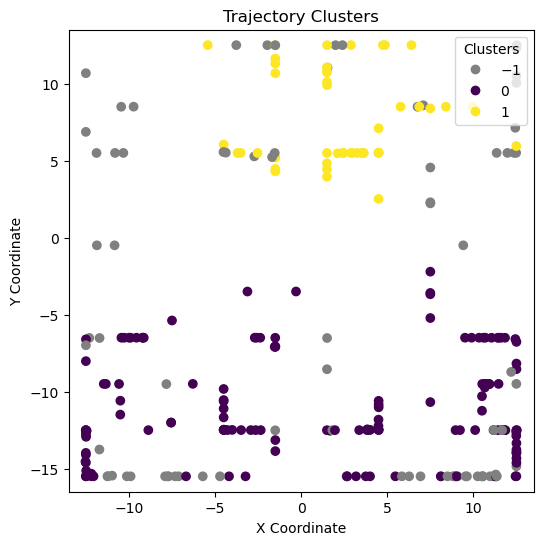

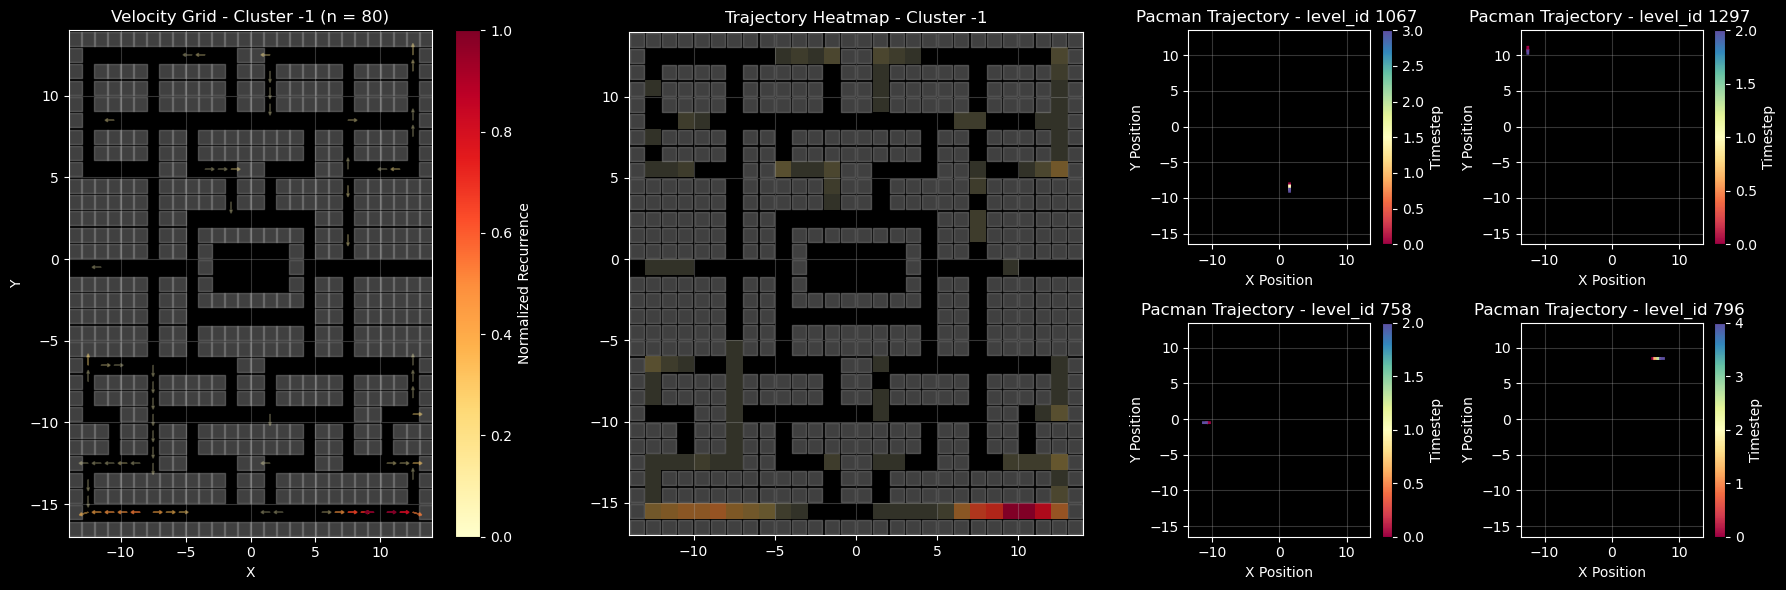

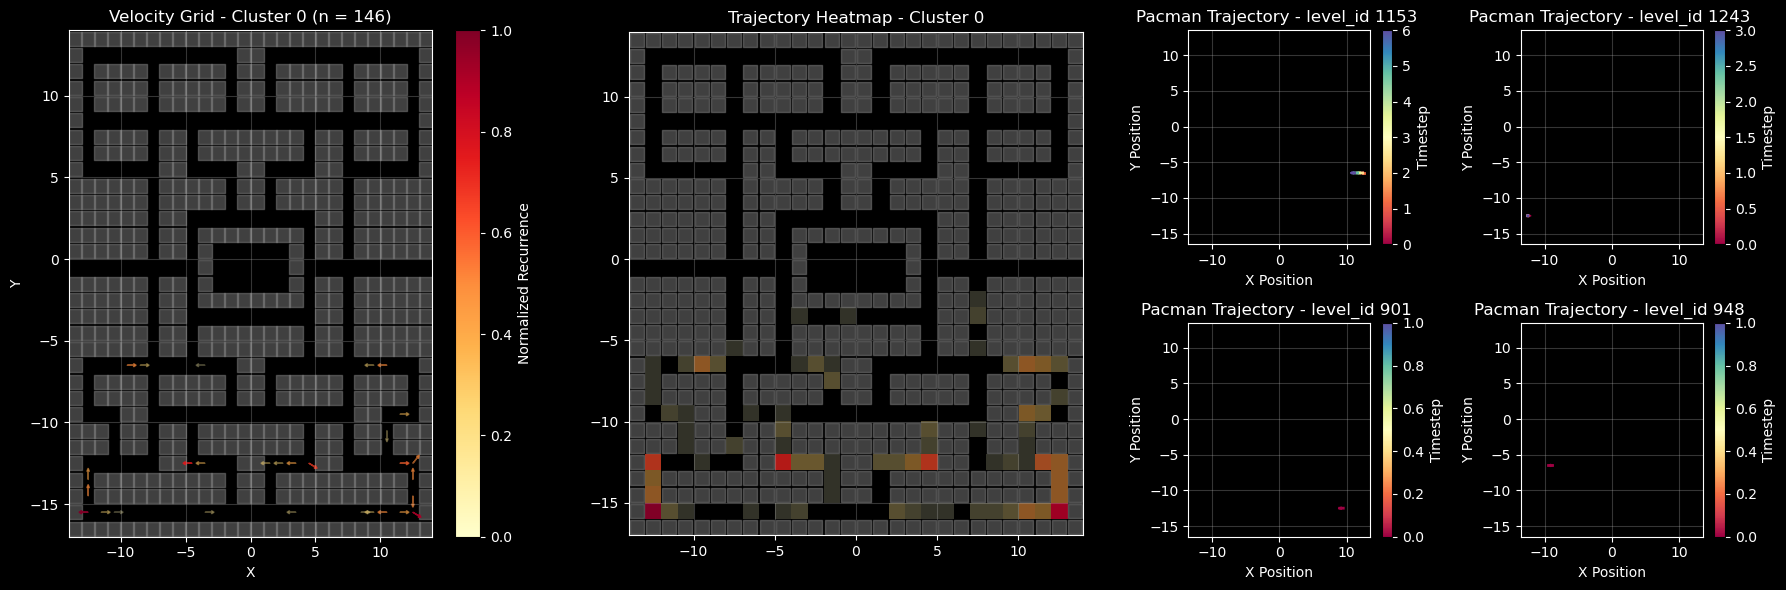

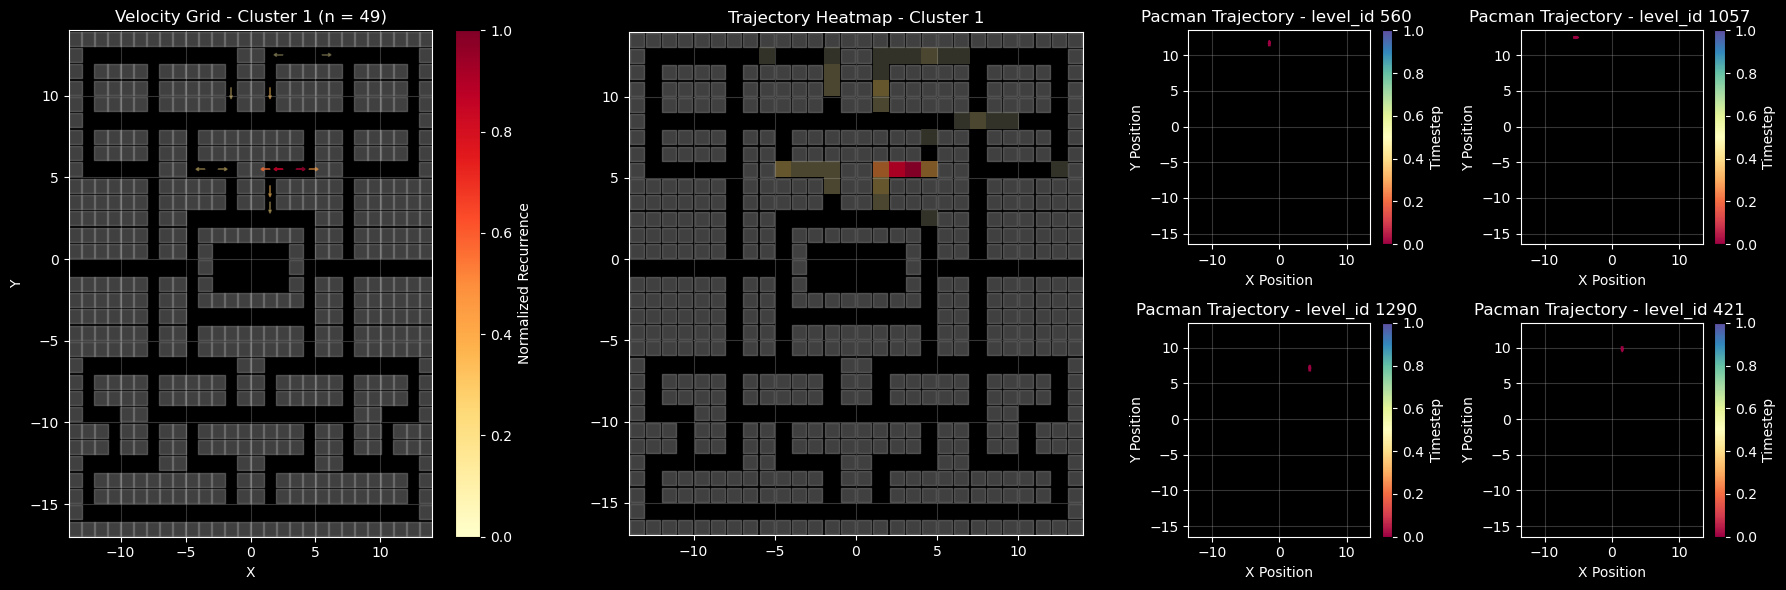

In [8]:
# Clustering.plot_affinity_matrix_overview()
Clustering.plot_trajectories_embedding(frame_to_maze=True)
for cluster_id in np.unique(Clustering.labels)[:5]:
    Clustering.plot_cluster_overview(cluster_id=cluster_id)

## Caution 2a and 2b

In [16]:
BEHAV_TYPE = "Caution2"
# VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.
cols = [col for col in Beh_encodings.summary_results.columns if col.startswith(BEHAV_TYPE)]

Beh_encodings.summary_results[cols]


,Caution2a_value,Caution2a_instances,Caution2b_value,Caution2b_instances
1338,14.929798,0,21.479042,0
1337,20.008530,0,22.719527,0
1336,15.970044,0,12.404738,0
1335,15.922709,0,14.963784,0
1334,18.350517,0,19.307337,0
...,...,...,...,...
392,18.359550,0,17.581866,0
391,16.251221,0,16.321163,0
390,18.353608,0,20.271262,0
389,14.567569,0,15.964106,0


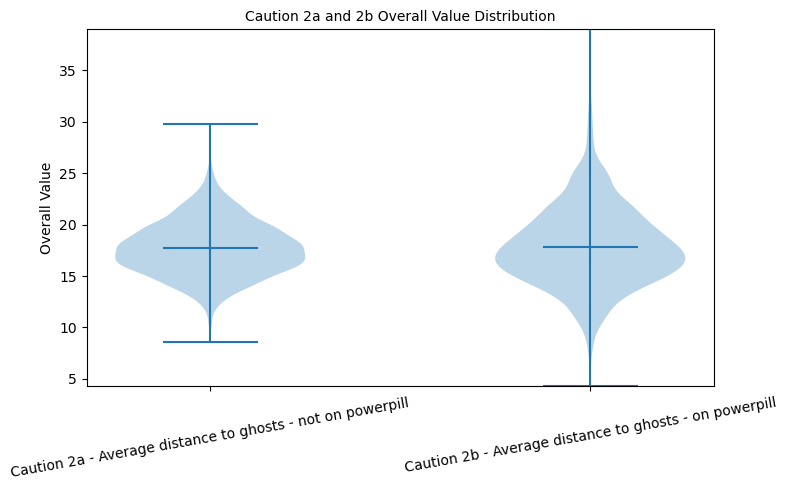

In [ ]:
values_a = Beh_encodings.summary_results["Caution2a_value"]
values_b = Beh_encodings.summary_results["Caution2b_value"]

# Filter out 0 values
values_a = values_a[values_a != 0]
values_b = values_b[values_b != 0]

# Combine for side-by-side violinplot
data = [values_a, values_b]
labels = [
    Beh_encodings.behavlets['Caution2a'].full_name,
    Beh_encodings.behavlets['Caution2b'].full_name,
]

fig, ax = plt.subplots(figsize=(8, 5))
parts = ax.violinplot(data, showmeans=True, showmedians=False, showextrema=True)

ax.set_xticks([1, 2])
ax.set_xticklabels(labels, rotation=10)
ax.set_ylabel("Overall Value")
ax.set_title("Caution 2a and 2b Overall Value Distribution")
ax.title.set_fontsize(10)

# Set same y scale for both
ymin = min(values_a.min(), values_b.min())
ymax = max(values_a.max(), values_b.max())
ax.set_ylim(ymin, ymax)

plt.tight_layout()
plt.show()